[python - 从pandas DataFrame制作热图](https://www.itranslater.com/qa/details/2128619780608361472)

#### 製造數據

In [1]:
import requests
from pyquery import PyQuery as pq
from selenium import webdriver
from selenium.webdriver.support.ui import Select

driver = webdriver.Chrome() #選擇Chrome瀏覽器
driver.get("http://www.taiwanlottery.com.tw/lotto/Lotto649/history.aspx")

Year = Select(driver.find_element_by_css_selector('#Lotto649Control_history_dropYear'))   #"年"下拉式選單
Month = Select(driver.find_element_by_css_selector('#Lotto649Control_history_dropMonth')) #"月"下拉式選單

year=[]
for op in Year.options:
    year.append(op.text)
    
month=[]
for op in Month.options:
    month.append(op.text)
    
Monthly_data_quantity=15   #每月數據量
all_data=[]
for y in year:
    for m in month: 
        driver.find_element_by_xpath('//*[@id="Lotto649Control_history_radYM"]').click()
        #選擇"中華民國    年    月的中獎號碼"的radio button
        Year = Select(driver.find_element_by_css_selector('#Lotto649Control_history_dropYear'))   #"年"下拉式選單
        Month = Select(driver.find_element_by_css_selector('#Lotto649Control_history_dropMonth')) #"月"下拉式選單
        Year.select_by_visible_text(y)   #選擇年
        Month.select_by_visible_text(m)  #選擇月
        driver.find_element_by_xpath('//*[@id="Lotto649Control_history_btnSubmit"]').click() #按下"查詢"
        doc = pq(driver.page_source)    #利用pyquery解析當前網頁
        data=[]                         #data表示每個網頁(每個月分)數據
        for i in range(Monthly_data_quantity):  #i表示每月資料的順序
            data.append([])                     
            for j in range(1,8):                #j表示七顆球號的大小順序那一列
                data[i].append(doc("#Lotto649Control_history_dlQuery_No"+str(j)+"_"+str(i)).text())
        for i in range(Monthly_data_quantity-1,-1,-1):  #如果沒有資料,就刪除空字串
            if data[i][0]=='':      
                del data[i]
        data.reverse() #翻轉順序,讓舊資料(網頁下面資料)在前面
        all_data+=data
        print('已經抓到第%d筆數據'%len(all_data))
driver.quit()

len(all_data) #總數據量

已經抓到第10筆數據
已經抓到第21筆數據
已經抓到第29筆數據
已經抓到第38筆數據
已經抓到第47筆數據
已經抓到第55筆數據
已經抓到第64筆數據
已經抓到第73筆數據
已經抓到第82筆數據
已經抓到第91筆數據
已經抓到第99筆數據
已經抓到第108筆數據
已經抓到第117筆數據
已經抓到第130筆數據
已經抓到第139筆數據
已經抓到第147筆數據
已經抓到第156筆數據
已經抓到第165筆數據
已經抓到第174筆數據
已經抓到第182筆數據
已經抓到第191筆數據
已經抓到第200筆數據
已經抓到第208筆數據
已經抓到第217筆數據
已經抓到第226筆數據
已經抓到第240筆數據
已經抓到第249筆數據
已經抓到第258筆數據
已經抓到第267筆數據
已經抓到第275筆數據
已經抓到第284筆數據
已經抓到第293筆數據
已經抓到第302筆數據
已經抓到第310筆數據
已經抓到第319筆數據
已經抓到第328筆數據
已經抓到第340筆數據
已經抓到第349筆數據
已經抓到第358筆數據
已經抓到第366筆數據
已經抓到第375筆數據
已經抓到第384筆數據
已經抓到第392筆數據
已經抓到第401筆數據
已經抓到第410筆數據
已經抓到第419筆數據
已經抓到第427筆數據
已經抓到第436筆數據
已經抓到第445筆數據
已經抓到第457筆數據
已經抓到第466筆數據
已經抓到第474筆數據
已經抓到第483筆數據
已經抓到第492筆數據
已經抓到第501筆數據
已經抓到第510筆數據
已經抓到第518筆數據
已經抓到第527筆數據
已經抓到第536筆數據
已經抓到第544筆數據
已經抓到第553筆數據
已經抓到第568筆數據
已經抓到第577筆數據
已經抓到第586筆數據
已經抓到第595筆數據
已經抓到第603筆數據
已經抓到第612筆數據
已經抓到第613筆數據
已經抓到第613筆數據
已經抓到第613筆數據
已經抓到第613筆數據
已經抓到第613筆數據


613

In [3]:
data = all_data

In [20]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# seq = range(1, 50)
# data = []
# for i in range(10000):
#     data.append(random.sample(seq, k=7))

def most_prediction(all_data=None, model_number=None):
    """輸入總歷史數據和需要統計次數，輸出最多的七個數字及出現次數"""
    model = []
    for i in range(1, model_number):
        model.extend(all_data[-i])
    vals, counts = np.unique(model, return_counts=True)
    return vals[np.argsort(-counts)][:7], counts[np.argsort(-counts)][:7]       

def check_the_winning_numbers(winning_number=None, prediction_number=None):
    """輸入兩個list回傳相同數字的數目"""
    intersection = set(winning_number) & set(prediction_number)
    return len(intersection)

col = ["100", "200", "300", "400", "500"]
df = pd.DataFrame(0, columns = col, index = range(4,21)) 

In [21]:
for k in [100, 200, 300, 400, 500]:
    for j in range(1, k+1):
        for i in range(4,21):
            n, m = most_prediction(all_data=data[:-j], model_number=i)
            if check_the_winning_numbers(winning_number=data[-j], prediction_number=n) >= 3:
                df[str(k)][i] += 1

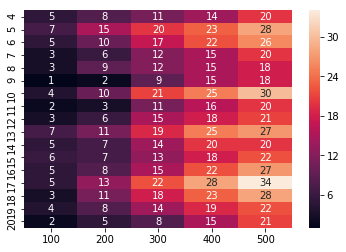

In [23]:
# fig, ax = plt.subplots()  
# fig.set_size_inches(20, 8) 
sns.heatmap(df, annot=True)                           

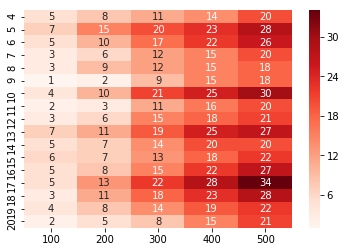

In [8]:
# fig, ax = plt.subplots()  
# fig.set_size_inches(20, 8) 
sns.heatmap(df, cmap='Reds', annot=True)

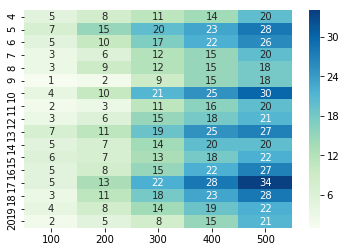

In [9]:
# fig, ax = plt.subplots()  
# fig.set_size_inches(20, 8) 
sns.heatmap(df, cmap='GnBu', annot=True)